Adam = ADAptive Moment Estimation

Adam - адаптивная оценка момента. Используются две переменные скользящего среднего:

$v$ – первый момент
$s$ – второй момент
Алгоритм вычисляет экспоненциально взвешенное среднее прошлых градиентов и их квадратов градиентов. Эти скользящие средние затем используются для обновления параметров модели.

Алгоритм Адама состоит из следующих шагов:

Инициализация переменных. Алгоритм начинается с инициализации переменных скользящего среднего $v$ и $s$ - словарей для хранения экспоненциально взвешенных средних градиентов и квадратов градиентов соответственно.

Вычисление скользящих средних. Для каждого параметра модели алгоритм вычисляет скользящее среднее градиентов путем объединения текущего градиента с предыдущим скользящим средним. Также вычисляется скользящее среднее квадратов градиентов.
Коррекция смещения. Чтобы уменьшить смещение во время начальных итераций, Adam выполняет коррекцию смещения путем деления скользящих средних на поправочный коэффициент.
Обновление параметров. Алгоритм обновляет параметры модели, используя скользящие средние градиентов и квадраты градиентов.

\begin{aligned} s_t &= \beta_1 s_{t-1} + \left(1 – \beta_1 \right ) \nabla w_t \\v_t &= \beta_2 v_{t-1} + \left(1 – \beta_2 \right ) \left(\nabla w_t \right )^2 \\\hat{s_t} &= \frac{s_t}{1 – {\beta_1}^t}\\ \hat{v_t} &= \frac{v_t}{1 – {\beta_2}^t}\\ w_{t + 1} &= w_t – \frac{\alpha\hat{s_t}}{\sqrt{\hat{v_t} + \epsilon}}  \end{aligned} 

$w_t$ - веса модели;

learning_rate ($\alpha$) - скорость обучения;

$\beta_1, \beta_2$ - скорости затухания для первого и второго моментов соответственно;

$s$ - оценка первого момента (среднее) градиентов;

$v$ - оценка второго момента (нецентрированная дисперсия) градиентов;

$t$ - текущая итерация;

$\epsilon$ - маленькое число, чтобы избежать деления на 0.

Минимум найден:
f([-1.63958683e-23  6.30142313e-23]) = 0.000000


C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_9856\1794594849.py:83: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


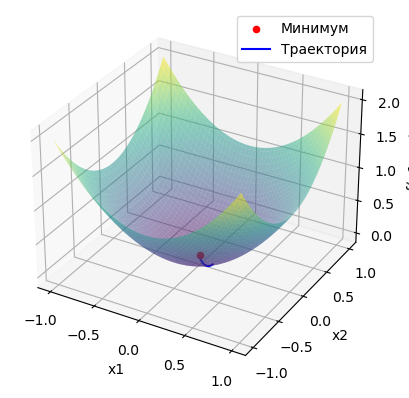

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# целевая функция
def objective(x1, x2):
    return x1**2 + x2**2

# градиент целевой функции
def gradient(x1, x2):
    return np.array([2*x1, 2*x2])

# инициализация моментов
def init_adam():
    s = np.zeros(2)
    v = np.zeros(2)
    return s, v

# шаг Adam - пересчет параметров
def adam_update_weights(x, grad, s, v, iteration, learning_rate, beta1, beta2, epsylon = 1e-8):
    s = beta1*s + (1 - beta1)*grad
    v = beta2*v + (1 - beta2)*(grad**2)
    s_hat = s / (1 - beta1**(iteration + 1))
    v_hat = v / (1 - beta2**(iteration + 1))
    x -= learning_rate * s_hat / np.sqrt(v_hat + epsylon)
    return x, s, v

# алгоритм Adam
def adam(objective, grad, bounds, max_iter, learning_rate, beta1, beta2, epsylon = 1e-8):
    # начальная точка
    x = bounds[:, 0] + np.random.rand(len(bounds))*(bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    scores, trajectory = [], []
    # инициализация моментов
    s, v = init_adam()
    
    # градиентный спуск Adam
    for _ in range(max_iter):
        # вычисление градиента
        grad = gradient(x[0], x[1])
        
        # пересчет параметров
        x, s, v = adam_update_weights(x, grad, s, v, _, learning_rate, beta1, beta2, epsylon)
        
        # вычисление целевой функции
        score = objective(x[0], x[1])
        scores.append(score)
        trajectory.append(x.copy())
        
       
    return x, scores, trajectory

np.random.seed(123)

# определение границ
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])

max_iter = 500
learning_rate = 0.01
beta1 = 0.8
beta2 = 0.999

# Градиентный спуск Adam
x_min, scores, trajectory = adam(objective, gradient, bounds, max_iter, learning_rate, beta1, beta2)
print("Минимум найден:")
print("f(%s) = %f" % (x_min, scores[-1]))

# визуализация
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(X, Y, Z, cmap = 'viridis', alpha = 0.5)
ax.scatter(x_min[0], x_min[1], objective(x_min[0], x_min[1]), color = 'red', label = "Минимум")
ax.plot([point[0] for point in trajectory], [point[1] for point in trajectory], scores, color = "blue", label = "Траектория")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.legend()
fig.show()


Задание


Модифицировать класс градиентного спуска для линейной регрессии с использованием алгоритма Adam.
Сравнить скорость обучения и качество модели для набора данных videogames.